<a href="https://colab.research.google.com/github/harishsahadev/MLP_LectureCodes/blob/main/Week2_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L2.9

## Importing basic libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

## 1. Feature Extraction

### DictVectorizer

Converts a list of dictionary objeccts to feature matrix

In [ ]:
data = [{'age' : 4, 'height' : 96.0},
        {'age' : 1, 'height' : 73.9},
        {'age' : 3, 'height' : 88.9},
        {'age' : 2, 'height' : 81.6}]

In [ ]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
data_transformed

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

In [ ]:
data_transformed.shape

(4, 2)

## 2. Data Imputation

Identifies missing values in each feature of the dataset and replaces them with an appropriate value base on fixed strategy such as:
* mean or median or mode of that feature
* use specific constant value

In [ ]:
from sklearn.impute import SimpleImputer

Some of its important parameters:


*    *missing_values:* Could be `int`, `float`, `str`, `np.nan` or `None`. Default is `np.nan`.

*    *strategy:* string, default is 'mean'.  One the following strategies can be used:

>*     ``` mean``` - missing values are replaced using the **mean** along each column
>*     ``` median``` - missing values are replaced using the **median** along each column
>*     ```most_frequent``` - missing values are replaced using the **most frequent** along each column
>*    ```constant```  - missing values are replaced with value specified in  `fill_value` argument.

* `add_indicator` is a boolean parameter that when set to `True` returns **missing value indicators** in `indicator_` member variable.  

**Note**:
- `mean` and `median` strategies can only be used with numeric data.
- `most_frequent` and `constant` strategies can be used with strings or numeric data.

### Data imputation on real world dataset

Using [heart-disease dataset from uci machine learning repository](https://archive.ics.uci.edu/ml/datasets/heart+disease) for this purpose.  We will load this dataset from csv file.

In [ ]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol',  'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope','ca', 'thal', 'num']
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None, names=cols)

The dataset has the following features:
```
1. Age (in years)
2. Sex (1 = male; 0 = female)
3. cp - chest pain type
4. trestbps - resting blood pressure (anything above 130-140 is typically cause for concern)
5. chol - serum cholestoral in mg/dl (above 200 is cause for concern)
6. fbs - fasting blood sugar ( > 120 mg/dl) (1 = true; 0 = false)
7. restecg - resting electrocardiographic results
   * 0 = normal;
   * 1 = having ST-T wave abnormality;
   * 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina
   * 1 = yes;
   * 0 = no
10. oldpeak - depression induced by exercise relative to rest
11. slope -  slope of the peak exercise ST segment
   * 1 = upsloping;
   * 2 = flat Value;
   * 3 = downsloping
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. num -  diagnosis of heart disease (angiographic disease status)(
    * 0: < 50% diameter narrowing;
    * 1: > 50% diameter narrowing
```

In [ ]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


**STEP 1**: Check if the dataset contains missing values.  
* This can be checked via dataset description or by check number of `nan` or `np.null` in the dataframe.  However such a check can be performed only for numerical features.  
* For non-numerical features, we can list their unique values and check if there are values like `?`.

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
# Check if there are any missing values in numeric columns

heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
# Listing unique values of non-numeric features (ca and thal)

print("Unique values in ca:", heart_data.ca.unique())
print("Unique values in thal:", heart_data.thal.unique())

Unique values in ca: ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in thal: ['6.0' '3.0' '7.0' '?']


Both contain '?'. Counting them

In [ ]:
print("# missing values in ca:",
      heart_data.loc[heart_data.ca == '?', 'ca'].count())
print("# missing values in thal:",
      heart_data.loc[heart_data.thal == '?', 'thal'].count())

# missing values in ca: 4
# missing values in thal: 2


**STEP 2**: Replace '?' with `nan`.

In [ ]:
heart_data.replace('?', np.nan, inplace=True)

**STEP 3**: Fill the missing values with `sklearn` missing value imputation utilities.  

> Here we use `SimpleImputer` with `mean` strategy.

We will try two variations -
* `add_indicator = False`: Default choice that only imputes missing values.


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
print(heart_data_imputed.shape)

(303, 14)


* `add_indicator = True`: Adds additional column for each column containing missing values. In our case, this adds two columns one for `ca` and other for `thal`.  It indicates if the sample has a missing value.

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', add_indicator=True)
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
print(heart_data_imputed.shape)

(303, 16)


## 3. Feature Scaling

Feature scaling **transforms feature values** such that **all the features are on the same scale**.  

When we use feature matrix with all features on the same scale, it provides us certain advantages as listed below:

*  **Enables faster convergence** in iterative optimization algorithms like gradient descent and its variants.
*  The performance of ML algorithms such as SVM, K-NN and K-means etc that compute euclidean distance among input samples gets impacted if the features are not scaled.

Tree based ML algorithms are not affected by feature-scaling.  In other words, feature scaling is not required for tree based ML algorithms.

Feature scaling can be performed with the following methods:
* Standardization
* Normalization
* MaxAbsScaler

In [ ]:
cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None, names=cols)

[Abalone dataset](https://archive.ics.uci.edu/ml/datasets/Abalone) has the following columns
```
1. Sex - nominal (M, F, and I (infant))
2. Length (mm - Longest shell measurement)
3. Diameter (mm - perpendicular to length)
4. Height (mm - with meat in shell)
5. Whole weight (grams - whole abalone)
6. Shucked weight (grams - weight of meat)
7. Viscera weight (grams - gut weight (after bleeding))
8. Shell weight (grams - after being dried)
9. Rings (target - age in years)
```

### **STEP 1**: Examine the dataset

Feature scaling is performed only on numerical attributes.  Let's check which are numerical attributes in this dataset.  We can get that via `info()` method.

In [ ]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


**STEP 1a** [OPTIONAL]: Convert non-numerical attributes to numerical ones.

> In this dataset, `Sex` is a non-numeric column in this dataset. Let's examine it and see if we can convert it to numeric representation:

In [ ]:
abalone_data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [ ]:
# assign numeric values to sex

abalone_data = abalone_data.replace({"Sex": {"M":1, "F":2, "I":3}})
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


### **STEP 2**: Separate labels from features.



In [ ]:
y = abalone_data.pop("Rings")
print("The DataFrame object after deleting the column")
abalone_data.info()

The DataFrame object after deleting the column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


## **STEP 3**: Examine feature scales


#### Statistical method

Check the scales of different feature with `describe()` method of dataframe.

In [ ]:
abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


Note that
* There are 4177 examples or rows in this dataset.  
* The mean and standard deviation of features are quite different from one another.  

> We can confirm that with a variety of visualization techniques and plots.

### Visualization of feature distributions

Visualize feature distributions.
* Histogram
* Kernel density estimation (KDE) plot
* Box
* Violin

#### Feature histogram

We will have separate and combined histogram plots to check if the feature are indeed on different scales.

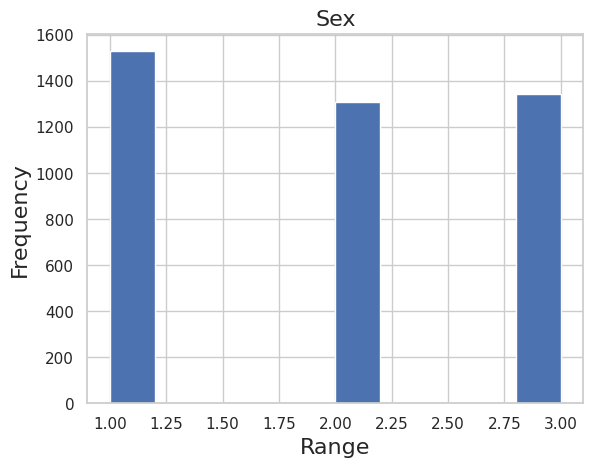

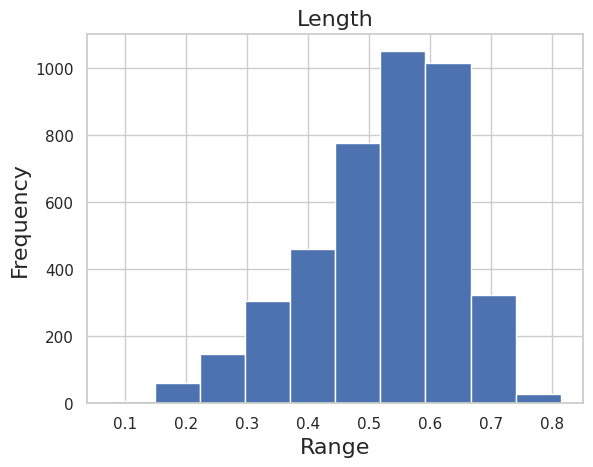

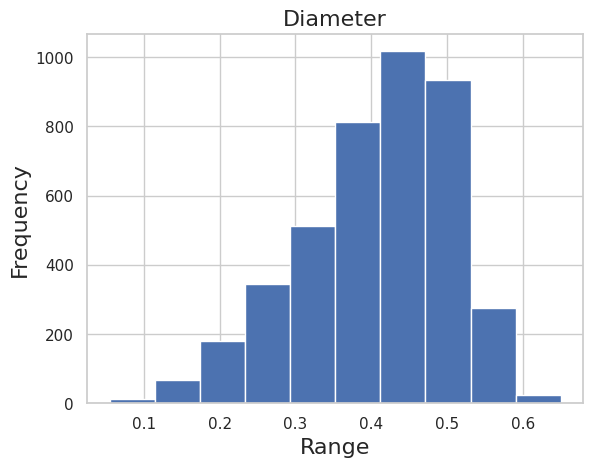

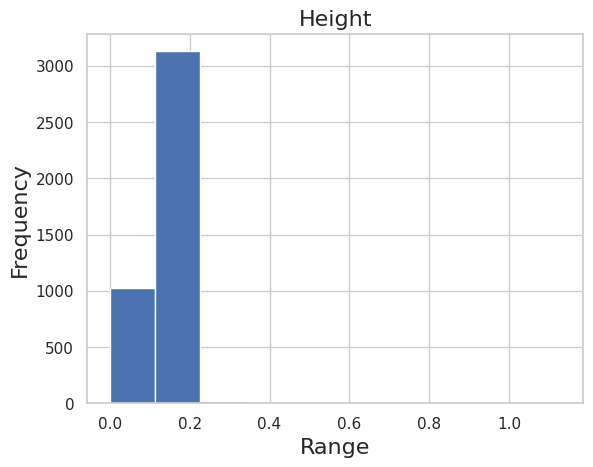

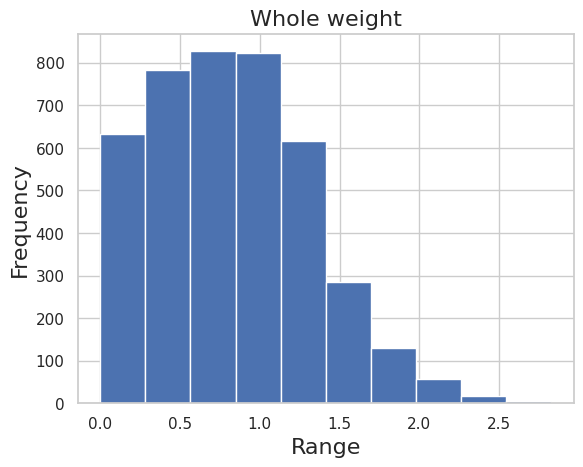

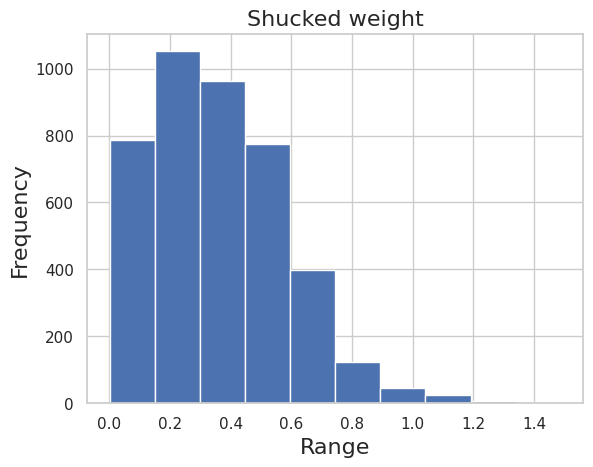

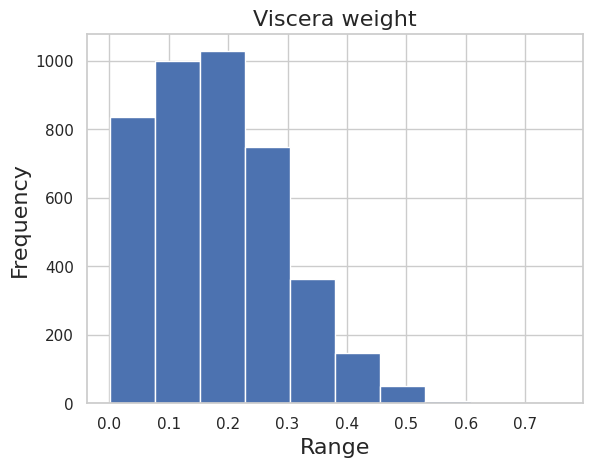

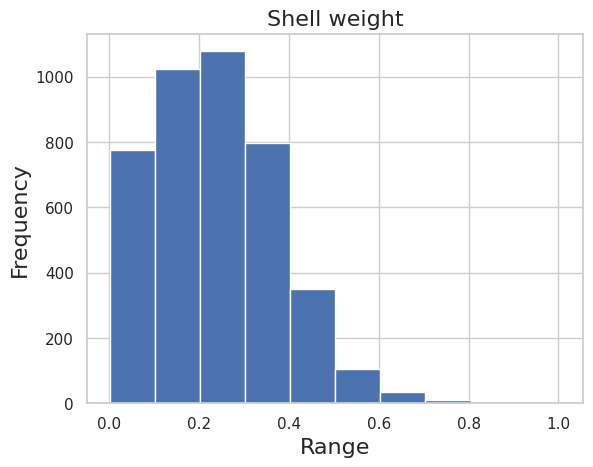

In [ ]:
#@title [Seperate Histograms]

for name in cols[0:len(cols)-1]:
  plt.hist(abalone_data[name].values) # histogram plot
  plt.title(name, fontsize=16)
  plt.xlabel('Range', fontsize=16)
  plt.ylabel('Frequency', fontsize=16)
  plt.show()

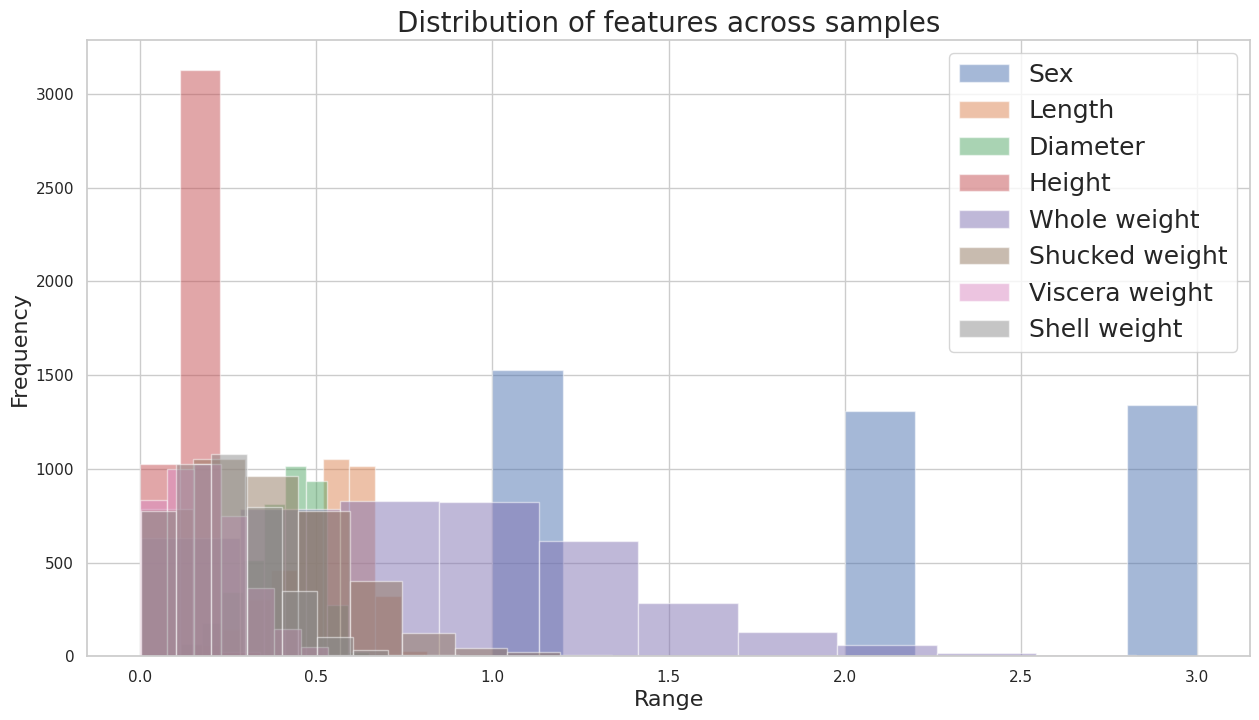

In [ ]:
#@title [Combined Histograms]

# create a new plot
plt.figure(figsize=(15,8))

for colname in abalone_data:
  plt.hist(abalone_data[colname].values, alpha=0.5)

# name the curves of features
in_cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']


plt.legend(in_cols, fontsize=18, loc="upper right", frameon=True)
plt.title('Distribution of features across samples', fontsize=20)
plt.xlabel('Range', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

#### KDE plot

Alternatively, we can generate **Kernel Density Estimate** plot using Gaussian kernels.

> In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable.

This function uses Gaussian kernels and includes automatic bandwidth determination.

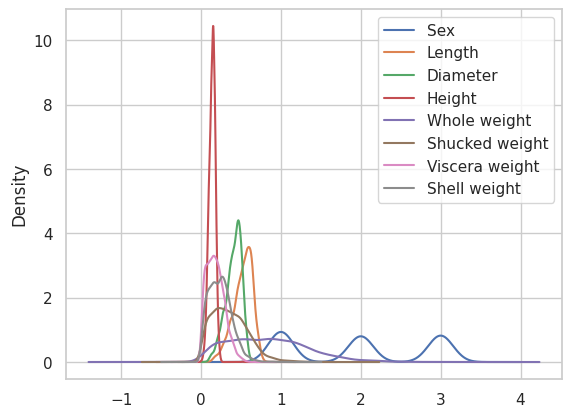

In [ ]:
#@title [KDE plots - combined]

ax = abalone_data.plot.kde()

#### Box plot


A **box plot** (or box-and-whisker plot) shows the **distribution of quantitative data** in a way that facilitates comparisons between variables or across levels of a categorical variable.

The box shows the **quartiles** of the dataset while the **whiskers** extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

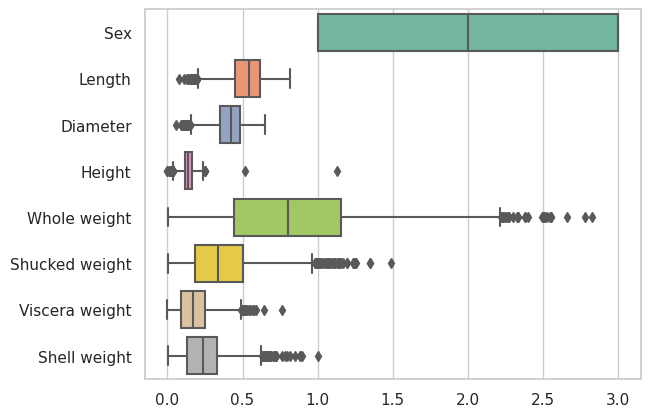

In [ ]:
#@title [Box plot]
ax = sns.boxplot(data=abalone_data, orient="h", palette="Set2")

#### Violin plot

A **violin** plot plays a similar role as a box and whisker plot.

It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.

Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

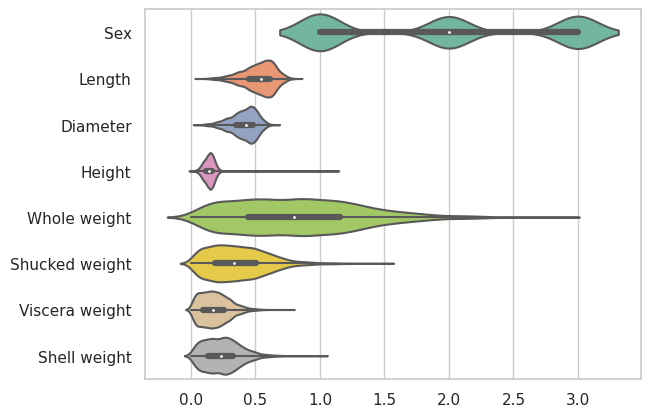

In [ ]:
#@title [Violin plot]
ax = sns.violinplot(data=abalone_data, orient="h", palette="Set2",  scale="width")

### STEP 4: Scaling

#### Normalization

The features are normalized such that their range lies between [0,1] or [-1,1].
There are two way to achieve this.
* `MaxAbsoluteScaler` transforms features in range [-1, 1]
* `MinMaxScaler` transforms features in range [0, 1]

##### MaxAbsoluteScalar

It transforms the original features vector $\mathbf{x}$ into new feature vector $\mathbf{x'}$ so that all values fall within  range $[-1,\ 1]$

$$\mathbf{x'} = \dfrac{\mathbf{x}}{\text{MaxAbsoluteValue}}$$

where $\text{MaxAbsoluteValue} = \text{max}(\mathbf{x}.max, |\mathbf{x}.min|)$

In [ ]:
x= np.array([4, 2, 5, -2, -100]).reshape(-1,1) # reshaping vector to matrix
print(x)

[[   4]
 [   2]
 [   5]
 [  -2]
 [-100]]


In [ ]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
x_new = mas.fit_transform(x)
print(x_new)

[[ 0.04]
 [ 0.02]
 [ 0.05]
 [-0.02]
 [-1.  ]]


#### MinMaxScalar

Normalization is a procedure in which the features' values are scaled such that they range between 0 and 1. This technique is also called **min-max scaling**.  It is performed with the following formula:
$$X_{new} = \dfrac{X_{old} - X_{min}}{X_{max}-X_{min}}$$

where
* $X_{old}$ is the old value of a data point, which is rescaled to $X_{new}$.
* $X_{min}$ is minimum value of feature $X$.
* $X_{max}$, is maximum value of feature $X$.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = abalone_data
mm = MinMaxScaler()
X_normalized = mm.fit_transform(X)
X_normalized[:5]

array([[0.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206],
       [0.        , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109],
       [0.5       , 0.61486486, 0.61344538, 0.11946903, 0.23906499,
        0.17182246, 0.18564845, 0.2077728 ],
       [0.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462],
       [1.        , 0.34459459, 0.33613445, 0.07079646, 0.07189658,
        0.0595158 , 0.05134957, 0.0533134 ]])

Mean and standard deviation (SD) of each feature:

In [ ]:
X_normalized.mean(axis=0)

array([0.47773522, 0.60674608, 0.59307774, 0.12346584, 0.29280756,
       0.24100033, 0.23712127, 0.2365031 ])

In [ ]:
X_normalized.std(axis=0)

array([0.4138578 , 0.16226829, 0.16676972, 0.03701066, 0.17366046,
       0.14925109, 0.14430695, 0.13870055])

The means and SDs of different features are now comparable.  We can confirm this again through visualization as before:

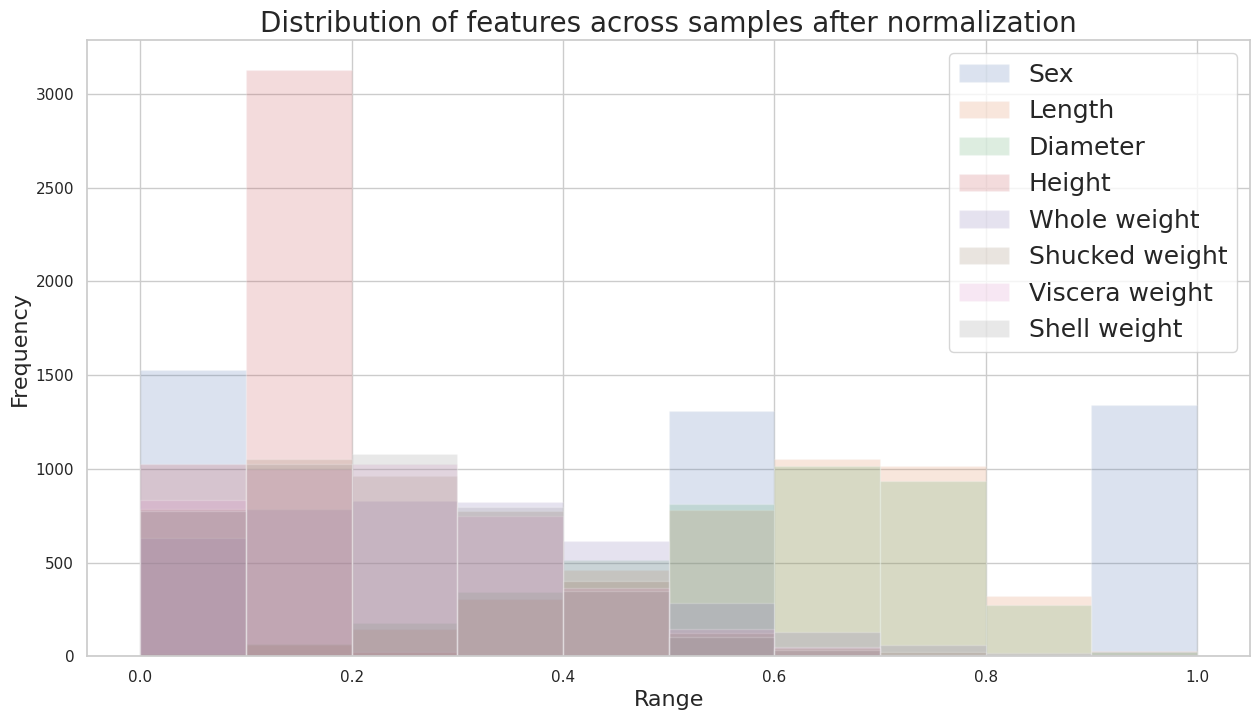

In [ ]:
#@title [Histogram of transformed features]
#  create a new plot
plt.figure(figsize=(15,8))

# convert ndarray into dataframe for plotting the histogram
data=pd.DataFrame(X_normalized, columns=in_cols)

for colname in abalone_data:
  plt.hist(data[colname].values, alpha=0.2)

plt.legend(in_cols, fontsize=18,loc="upper right",frameon=True)
plt.title('Distribution of features across samples after normalization',fontsize=20)
plt.xlabel('Range',fontsize=16)
plt.ylabel('Frequency',fontsize=16)

plt.show()

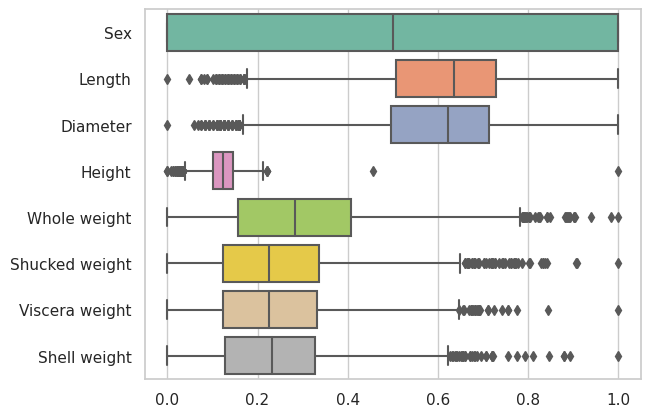

In [ ]:
#@title [Box plot]
ax = sns.boxplot(data=data, orient="h", palette="Set2")

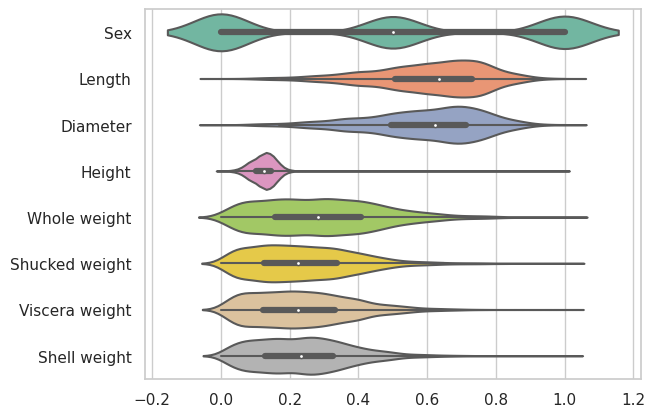

In [ ]:
#@title [Violin plot]
ax = sns.violinplot(data=data, orient="h", palette="Set2",  scale="width")

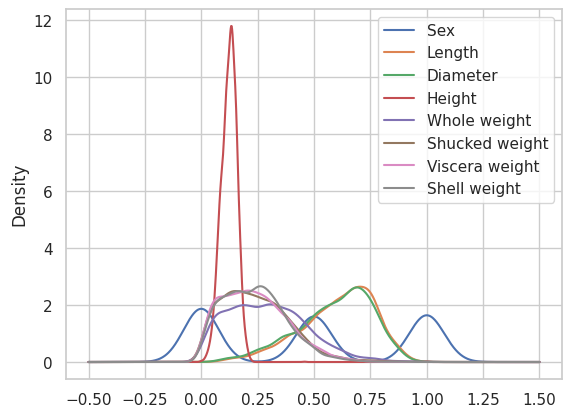

In [ ]:
#@title [KDE plot]
ax = data.plot.kde()

#### Standardization

Standardization is another feature scaling technique that results into (close to) zero mean and unit standard deviation of a feature's values.

Formula for standardization:

$$X_{new} = \dfrac{X_{old}- \mu}{\sigma}$$

Here, $\mu$ and $\sigma$ respectively are the mean and standard deviation of the feature values.

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_standardized = ss.fit_transform(X)
X_standardized[:5]

array([[-1.15434629, -0.57455813, -0.43214879, -1.06442415, -0.64189823,
        -0.60768536, -0.72621157, -0.63821689],
       [-1.15434629, -1.44898585, -1.439929  , -1.18397831, -1.23027711,
        -1.17090984, -1.20522124, -1.21298732],
       [ 0.05379815,  0.05003309,  0.12213032, -0.10799087, -0.30946926,
        -0.4634999 , -0.35668983, -0.20713907],
       [-1.15434629, -0.69947638, -0.43214879, -0.34709919, -0.63781934,
        -0.64823753, -0.60759966, -0.60229374],
       [ 1.26194258, -1.61554351, -1.54070702, -1.42308663, -1.27208566,
        -1.2159678 , -1.28733718, -1.32075677]])

In [ ]:
X_standardized.mean(axis=0)

array([-1.19075871e-17, -5.83471770e-16, -3.02792930e-16,  3.91249292e-16,
        9.18585294e-17, -1.02065033e-17,  2.70472337e-16,  2.97689679e-16])

In [ ]:
X_standardized.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

The means of different features are now comparable with SD=1.

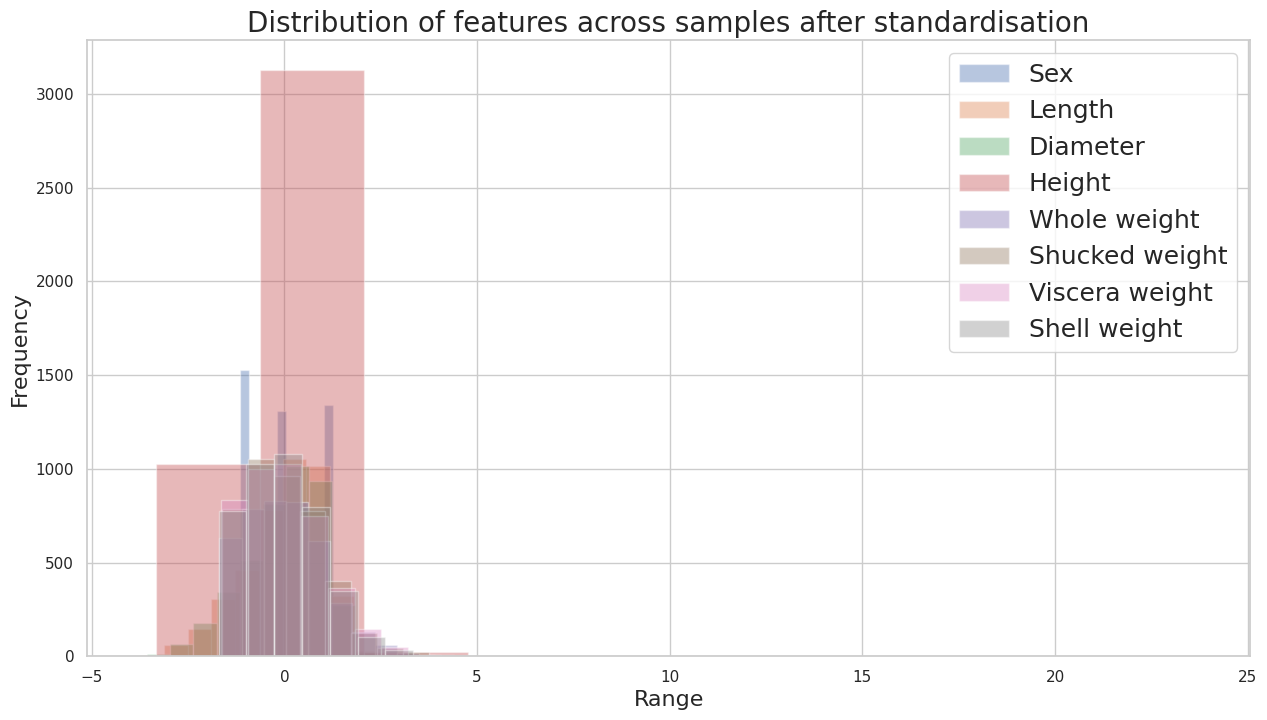

In [ ]:
#@title [Histogram - combined]
#  create a new plot
plt.figure(figsize=(15,8))
data=pd.DataFrame(X_standardized, columns=in_cols)
for colname in abalone_data:
  plt.hist(data[colname].values, alpha=0.4)

plt.legend(in_cols, fontsize=18,loc="upper right",frameon=True)
plt.title('Distribution of features across samples after standardisation',fontsize=20)
plt.xlabel('Range',fontsize=16)
plt.ylabel('Frequency',fontsize=16)

plt.show()

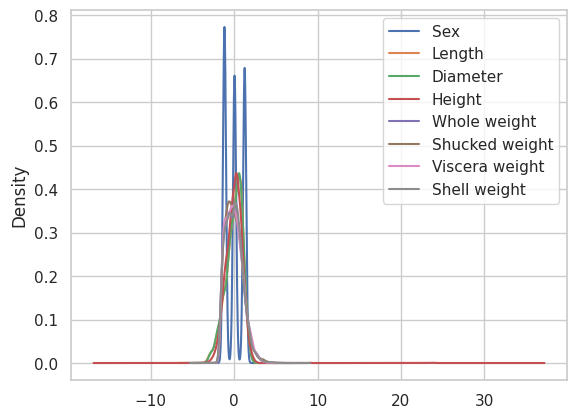

In [ ]:
#@title [KDE plot - combined]
ax = data.plot.kde()

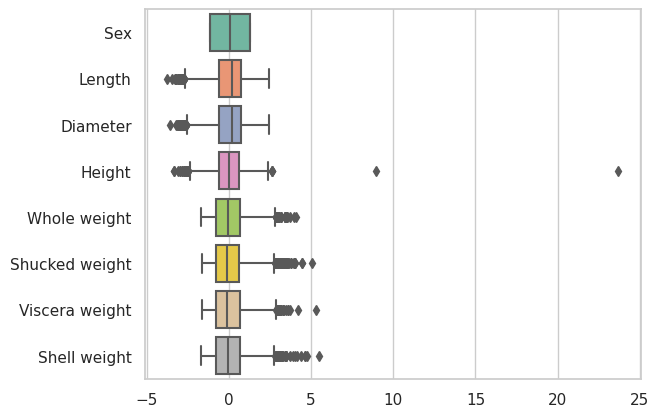

In [ ]:
#@title [Box plot]
ax = sns.boxplot(data=data, orient="h", palette="Set2")

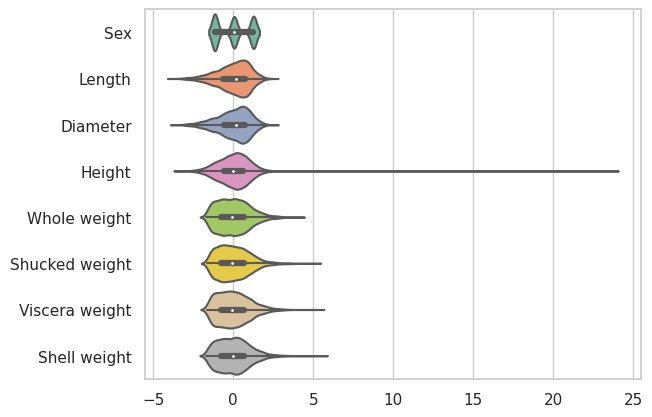

In [ ]:
#@title [Violin plot]
ax = sns.violinplot(data=data, orient="h", palette="Set2",  scale="width")

# L2.10

## 4. add_dummy_feature

Augments dataset with a column vector, each value in the column vector is $1$. This is useful for adding a parameter for bias term in the model.

In [ ]:
x = np.array(
    [[7, 1],
     [1, 8],
     [2, 0],
     [9, 6]]
)
x

array([[7, 1],
       [1, 8],
       [2, 0],
       [9, 6]])

In [ ]:
from sklearn.preprocessing import add_dummy_feature

x_new = add_dummy_feature(x)
print(x_new)

[[1. 7. 1.]
 [1. 1. 8.]
 [1. 2. 0.]
 [1. 9. 6.]]


## 5. Custom transformers

Enables conversion of an existing Python function into a transformer to assist in data cleaning or processing.

Useful when:
1. The dataset consists of *heterogeneous data types* (e.g. raster images and text captions),

2. The dataset is stored in a `pandas.DataFrame` and different columns require *different processing pipelines*.

3. We need stateless transformations such as taking the log of frequencies, custom scaling, etc.

In [ ]:
from sklearn.preprocessing import FunctionTransformer

You can implement a transformer from an arbitrary function with
`FunctionTransformer`.

* For example, let us build a transformer that applies a log transformation to features:

For this demonstration, we will be using a [wine quality dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality) from UCI machine learning repository.

It has got the following attributes:
```
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality (output: score between 0 and 10)
```

In [ ]:
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";")

In [ ]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Let's use `np.log1p` which returns natural logarithm of (1 + the feature value).

In [ ]:
transformer = FunctionTransformer(np.log1p, validate=True)
wine_data_transformerd = transformer.transform(np.array(wine_data))
pd.DataFrame(wine_data_transformerd, columns=wine_data.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,2.215842,0.178100,1.722767,2.091864,2.186051,2.322388,2.827314
volatile acidity,1599.0,0.417173,0.114926,0.113329,0.329304,0.418710,0.494696,0.947789
citric acid,1599.0,0.228147,0.152423,0.000000,0.086178,0.231112,0.350657,0.693147
residual sugar,1599.0,1.218131,0.269969,0.641854,1.064711,1.163151,1.280934,2.803360
chlorides,1599.0,0.083038,0.038991,0.011929,0.067659,0.076035,0.086178,0.476855
free sulfur dioxide,1599.0,2.639013,0.623790,0.693147,2.079442,2.708050,3.091042,4.290459
total sulfur dioxide,1599.0,3.634750,0.682575,1.945910,3.135494,3.663562,4.143135,5.669881
density,1599.0,0.691519,0.000945,0.688170,0.690945,0.691521,0.692064,0.694990
pH,1599.0,1.460557,0.035760,1.319086,1.437463,1.460938,1.481605,1.611436
sulphates,1599.0,0.501073,0.093731,0.285179,0.438255,0.482426,0.548121,1.098612


Notice the change in statistics of all features.

For example,
```
total sulfur dioxide	1599.0	46.467792	32.895324	6.00000	22.0000	38.00000	62.000000	289.00000
```
became
```
total sulfur dioxide	1599.0	3.634750	0.682575	1.945910	3.135494	3.663562	4.143135	5.669881
```

## 6. Polynomimal Features

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.
- For example, if an input sample is two dimensional and of the form $[a, b]$, the degree-2 polynomial features are $ [1, a, b, a^2, ab, b^2] $.

`sklearn.preprocessing.PolynomialFeatures` enables us to perform polynomial transformation of desired degree.  Let's demonstrate it with *wine quality* dataset.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";")
wine_data_copy = wine_data.copy()
wine_data = wine_data.drop(['quality'], axis=1)
print("No. of features before transformation:", wine_data.shape)

# fit a polynomial of degree 2 to wine_data

poly = PolynomialFeatures(degree=2)
poly_wine_data = poly.fit_transform(wine_data)
print("No. of features after transformation:", poly_wine_data.shape)

No. of features before transformation: (1599, 11)
No. of features after transformation: (1599, 78)


In [ ]:
# List out these features

poly.get_feature_names_out()

array(['1', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'fixed acidity^2', 'fixed acidity volatile acidity',
       'fixed acidity citric acid', 'fixed acidity residual sugar',
       'fixed acidity chlorides', 'fixed acidity free sulfur dioxide',
       'fixed acidity total sulfur dioxide', 'fixed acidity density',
       'fixed acidity pH', 'fixed acidity sulphates',
       'fixed acidity alcohol', 'volatile acidity^2',
       'volatile acidity citric acid', 'volatile acidity residual sugar',
       'volatile acidity chlorides',
       'volatile acidity free sulfur dioxide',
       'volatile acidity total sulfur dioxide',
       'volatile acidity density', 'volatile acidity pH',
       'volatile acidity sulphates', 'volatile acidity alcohol',
       'citric acid^2', 'citric acid residual sugar',
       'citric acid chlorides', 'citric aci

Observe that -
* Some features have `^2` suffix - these are degree 2 features of the input features. For example, `sulphates^2` is the square of `sulphates` features.
* Some features are combination of names of the original feature names. For example, `total sulfur dioxide pH` is a combination of two features `total sulfur dioxide` and `pH`.



## 7. Discretization

**Discretization** (otherwise known as **quantization** or **binning**) provides a way to partition continuous features into discrete values.
- Certain datasets with continuous features may benefit from discretization, because discretization can transform the dataset of continuous attributes to one with only nominal attributes.

- One-hot encoded discretized features can make a model more expressive, while maintaining interpretability.

- For instance, pre-processing with a discretizer can introduce nonlinearity to linear models.

In [ ]:
# KBinsDiscretizer discretizes features into k bins

from sklearn.preprocessing import KBinsDiscretizer

# demonstration on wine quality dataset

wine_data = wine_data_copy.copy()

#transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode="onehot")
X = np.array(wine_data['chlorides']).reshape(-1, 1)
X_binned = enc.fit_transform(X)

In [ ]:
X_binned

<1599x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1599 stored elements in Compressed Sparse Row format>

In [ ]:
X_binned.toarray()[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

## 8. Handling Categorical Features

We need to convert the categorical features into numeric features.

1. Ordinal encoding
2. One-hot encoding
3. Label encoder
4. Using dummy variables


### **Ordinal Encoding**

Categorical features are those that contain categories or groups such as education level, state etc as their data. These are non-numerical features and need to be converted into appropriate form before they feeding them for training an ML model.

One intuitive way of handling them could be to assign them a numerical value. As an example, take state as a feature with 'Punjab', 'Rajasthan' and 'Haryana' as the possible values. We might consider assigning numbers to these values as follows:


$$
\begin{array}{c|c}
Old~feature & New~feature \\
\hline
\text{Punjab}&\text{1}\\
\hline
\text{Rajasthan}&\text{2}\\
\hline
\text{Haryana}&\text{3}\\
\end{array}
$$

However, this approach assigns some ordering to the labels, i.e., states, thus representing that Haryana is thrice Punjab and Rajasthan is twice Punjab, these relationships do not exist in the data, thus providing wrong information to the ML model.

One of the most-common approaches to handle this is: *One-hot encoding*.

## **One-hot Encoding**

This approach consists of creating an additional feature for each label present in the categorical feature (i.e., the number of different states here) and putting a 1 or 0 for these new features depending on the categorical feature's value. That is,

$$
\begin{array}{c|c}
Old~feature & New~feature_1 (Punjab) & New~feature_2 (Rajasthan)&New~feature_3 (Haryana)\\
\hline
\text{Punjab}&\text{1}&0&0\\
\hline
\text{Rajasthan}&\text{0}&1&0\\
\hline
\text{Haryana}&\text{0}&0&1\\
\end{array}
$$


It may be implemented using `OneHotEncoder` class from `sklearn.preprocessing` module.  Let's demonstrate this concept with `Iris` dataset.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

[**Iris dataset**](https://archive.ics.uci.edu/ml/datasets/iris) has the following features:

```
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Iris Setosa, Iris Versicolour, Iris Virginica
```

In [ ]:
cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None, names=cols)
iris_data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# label is categorical attribute

iris_data.label.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# coverting 3 class labels into one hot vectors

onehotencoder = OneHotEncoder(categories='auto')
print("Shape of y before encoding", iris_data.label.shape)

'''
Passing 1d arrays as data to onehotencoder is deprecated in version ,
hence reshape to (-1,1)  to have two dimensions.
Input of onehotencoder fit_transform must not be 1-rank array
'''
iris_labels = onehotencoder.fit_transform(iris_data.label.values.reshape(-1, 1))

# y.reshape(-1,1) is a 450x1 sparse matrix of type '<class 'numpy.float64'>'
# with 150 stored elements in Coordinate format.
# y is a 150x3 sparse matrix of type '<class 'numpy.float64'>' with 150 stored
# elements in compressed sparse row format.
print("Shape of y after encoding", iris_labels.shape)


# since output is sparse use to_array() to expand it
print("first 5 labels:")
print(iris_labels.toarray()[:5])

Shape of y before encoding (150,)
Shape of y after encoding (150, 3)
first 5 labels:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


Observer diffrence between hot and ordinal encoding

In [ ]:
enc = OrdinalEncoder()
iris_labels = np.array(iris_data['label'])

iris_labels_transformed = enc.fit_transform(iris_labels.reshape(-1, 1))
print("Unique labels:", np.unique(iris_labels_transformed))

print("\nFirst 5 labels:")
print(iris_labels_transformed[:5])

Unique labels: [0. 1. 2.]

First 5 labels:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


###LabelEncoder

Transforms categorical features into integer codes

In [ ]:
from sklearn.preprocessing import LabelEncoder

# get class column in new variable
iris_labels = np.array(iris_data['label'])

#encode the class names to integers
enc = LabelEncoder()
label_integer = enc.fit_transform(iris_labels)
label_integer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

###MultilabelBinarizer

Encodes features with values between 0 and k-1, where k is number of classes

In [ ]:
movie_genres =[{'action', 'comedy' },
               {'comedy'},
               {'action', 'thriller'},
               {'science-fiction', 'action', 'thriller'}]

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit_transform(movie_genres)

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

### Using dummy varibles

In [ ]:
# use get_dummies to create a one-hot encoding for each unique categorical value in the 'class' column
# Convert categorical class variable to one-hot encoding:

iris_data_onehot = pd.get_dummies(iris_data, columns=['label'], prefix=['one_hot'])
iris_data_onehot

,sepal length,sepal width,petal length,petal width,one_hot_Iris-setosa,one_hot_Iris-versicolor,one_hot_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


## 9. Composite Transformers

### Column Transformer

It applies a set of transformers to columns of an array or `pandas.DataFrame`, concatenates the transformed outputs from different transformers into a single matrix.

* It is useful for transforming heterogenous data by applying different transformers to separate subsets of features.

* It combines different feature selection mechanisms and transformation into a single transformer object.

In [ ]:
x = [
   [20.0, 'male',],
   [11.2, 'female',],
   [15.6, 'female',],
   [13.0, 'male',],
   [18.6, 'male',],
   [16.4, 'female',]
]
x = np.array(x)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder

ct = ColumnTransformer([
    ('scalar', MaxAbsScaler(), [0]),
    ('pass', 'passthrough', [0]),
    ('encoder', OneHotEncoder(), [1])
])

ct.fit_transform(x)

array([['1.0', '20.0', '0.0', '1.0'],
       ['0.5599999999999999', '11.2', '1.0', '0.0'],
       ['0.78', '15.6', '1.0', '0.0'],
       ['0.65', '13.0', '0.0', '1.0'],
       ['0.93', '18.6', '0.0', '1.0'],
       ['0.82', '16.4', '1.0', '0.0']], dtype='<U32')

### TransformedTargetRegressor

Transforms the target variable `y` before fitting a regression model.

* The predicted values are mapped back to the original space via an inverse transform.
* It takes **regressor** and transformer to be applied to the target variable as arguments.

In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True)
X, y = X[:2000, :], y[:2000] # select a subset of data

transformer = MaxAbsScaler()

# Two regressor - one based on original label
regressor = LinearRegression()

# second regressor with transformed labels
regr = TransformedTargetRegressor(regressor=regressor, transformer=transformer)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

regr.fit(X_train, y_train)
print('R2 score of raw label regression: {0:.2f}'.format(regr.score(X_test, y_test)))

raw_target_regr = LinearRegression().fit(X_train, y_train)
print('R2 score of transformed label regression: {0:.2f}'.format(raw_target_regr.score(X_test, y_test)))

R2 score of raw label regression: 0.59
R2 score of transformed label regression: 0.59


# L 2.11

## **10. Feature Selection**

`sklearn.feature_selection` module has useful APIs to select features/ reduce dimensionality, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

### Filter based methods

#### VarianceThreshold

This transformer helps to keep only high variance features by providing a certain threshold.

> Features with variance greater or equal to threshold value are kept rest are removed.

> By default it removes any feature with same value i.e. 0 variance.

In [ ]:
from sklearn.feature_extraction import DictVectorizer

data = [{'age': 4, 'height':96.0},
        {'age': 1, 'height':73.9},
        {'age': 3, 'height':88.9},
        {'age': 2, 'height':81.6}]

dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
np.var(data_transformed, axis=0)

array([ 1.25 , 67.735])

In [ ]:
data_transformed

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

In [ ]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold = 9) # Selects features with variance >9
data_new = vt.fit_transform(data_transformed)
data_new

array([[96. ],
       [73.9],
       [88.9],
       [81.6]])

#### SelectKBest

Selects k highest scoring features based on a function and removes the rest of the features

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# download data
X_california, y_california = fetch_california_housing(return_X_y=True)

# select a subset of data
X, y = X_california[:2000, :], y_california[:2000]

print(f'Shape of feature matrix before feature selection:{X.shape}')

Shape of feature matrix before feature selection:(2000, 8)


Let's select 3 most important features, since it is a regression problem, we can use only `mutual_info_regression` or `f_regression` scoring functions only.

In [ ]:
skb = SelectKBest(mutual_info_regression, k=3)
X_new = skb.fit_transform(X,y)
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Shape of feature matrix after feature selection:(2000, 3)


In [ ]:
# Checking the features of the transformed data

skb.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

#### SelectPercentile

This is very similar to `SelectKBest` from previous section, the only difference is, it selects top `percentile` of all features and drops the rest of the features.

Similar to `SelectKBest`, it also uses a scoring function to decide importance of features.

Let's use the california housing price dataset for this API.

In [ ]:
from sklearn.feature_selection import SelectPercentile
sp = SelectPercentile(mutual_info_regression, percentile=30)
X_new - sp.fit_transform(X, y)
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Shape of feature matrix after feature selection:(2000, 3)


In [ ]:
# Checking the features of the transformed data

skb.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

#### GenericUnivariateSelect

It applies univariate feature selection with a certain strategy, which is passed to the API via `mode` parameter. The `mode` can take one of the following values: `percentile` (top percentage), `k_best` (top k), `fpr` (false positive rate), `fdr`(false discovery rate), `fwe` (family wise error rate).


If we want to accomplish the same objective as `SelectKBest`, we can use following code:

In [ ]:
from sklearn.feature_selection import GenericUnivariateSelect
gus = GenericUnivariateSelect(mutual_info_regression, mode='k_best', param=3)
X_new = gus.fit_transform(X,y)
print(f'Shape of feature matrix before feature selection:{X.shape}')
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Shape of feature matrix before feature selection:(2000, 8)
Shape of feature matrix after feature selection:(2000, 3)


### Wrapper based methods

#### RFE (Recursive Feature Elimination)

* **STEP 1**: Fits a model and
* **STEP 2**: Ranks the features, afterwards it removes one or more features (depending upon `step` parameter).

These two steps are repeated until desired number of features are selected.

In [ ]:
# from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X, y)

# support_ is a boolean array
# marking which features are selected
print(selector.support_)

# rank of each feature :-
# if it's value is '1', then it is selected
# features with rank 2 and above are ranked least

print(f'Rank of each feature is: {selector.ranking_}')

[ True False False False False False  True  True]
Rank of each feature is: [1 5 4 3 6 2 1 1]


#### RFE-CV

This adds another layer of cross validation to `RFE`.

#### SelectFromModel

>  Selects desired number of important features (as specified with `max_features` parameter) above certain threshold of feature importance as obtained from the trained estimator.

* The feature importance is obtained via `coef_`, `feature_importances_` or an `importance_getter` callable from the trained estimator.

* The feature importance threshold can be specified either numerically or through string argument based on built-in heuristics such as `mean`, `median` and float multiples of these like `0.1*mean`.

The following example uses california housing price dataset. Using `SelectFromModel` top three features are selected.

In [ ]:
from sklearn.feature_selection import SelectFromModel

estimator = LinearRegression()
estimator.fit(X, y)

print(f'Coefficients of features: {estimator.coef_}')
print(f'Indices of top {3} features: {np.argsort(estimator.coef_)[-3:]}')
t = np.argsort(np.abs(estimator.coef_))[-3:]
model = SelectFromModel(estimator, max_features=3, prefit=True)
X_new = model.transform(X)
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Coefficients of features: [ 3.64048292e-01  5.56221906e-03  5.13591243e-02 -1.64474348e-01
  5.90411479e-05 -1.64573915e-01 -2.17724525e-01 -1.85343265e-01]
Indices of top 3 features: [1 2 0]
Shape of feature matrix after feature selection:(2000, 3)


#### SequentialFeatureSelection

Perform selection by selecting or deselecting features one by one in a greedy manner

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
%%time
estimator = LinearRegression()

sfs = SequentialFeatureSelector(estimator, n_features_to_select=3) # Forward mode
sfs.fit_transform(X, y)

print(sfs.get_support())

[ True False False False False  True  True False]
CPU times: user 296 ms, sys: 0 ns, total: 296 ms
Wall time: 304 ms


The features corresponding to `True` in the output `sfs.get_support()` are selected.  In this case, feature 1, 6 and 7 are selected.

In [ ]:
%%time
estimator = LinearRegression()

sfs = SequentialFeatureSelector(estimator, n_features_to_select=3, direction='backward') # Backward mode
sfs.fit_transform(X, y)

print(sfs.get_support())

[ True False False False False  True  True False]
CPU times: user 490 ms, sys: 242 ms, total: 732 ms
Wall time: 471 ms


A couple of observations:
* Both `forward` and `backward` selection methods select the same features.
* The `backward` selection method takes longer than `forward` selection method.

From above examples, we can observe that depending upon number of features, SFS can accomplish feature selection in different periods forward and backward.

## PCA

PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that capture maximum amount of the variance.

It helps in reducing dimensions of a dataset, thus computational cost of next steps e.g. training a model, cross validation etc.


Lets generate some artificial data to better understand PCA:

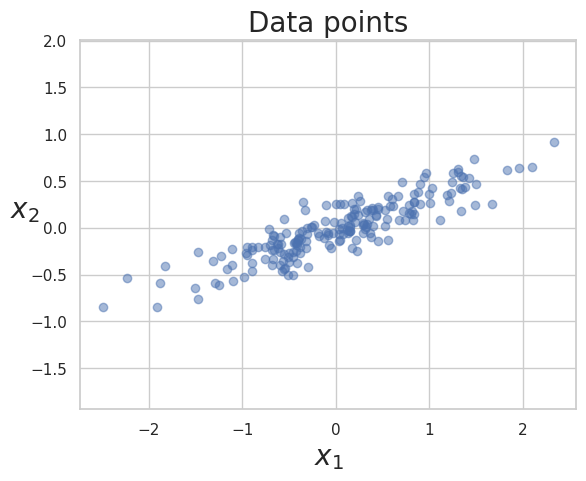

In [ ]:
#@title [Generate synthetic dataset]
rand = np.random.RandomState(1)
X = np.dot(rand.rand(2, 2), rand.randn(2, 200)).T

plt.figure()
plt.title('Data points', size = 20)

# set x and y labels
plt.xlabel('$x_1$', size=20)
plt.ylabel('$x_2$', size=20, rotation = 0)

# plot the data points
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.axis('equal');

In [ ]:
# Fit a PCA transformer on this data and compute its 2 principal components

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Let's print the principal axes, they are two 2D vectors for this example. The PCA object returns them in the form of a matrix, where **each column represents a principal component**:

In [ ]:
print(f'The {pca.n_components_} principal axes are\n', pca.components_)

The 2 principal axes are
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
# explained variance corresponding to each principal axes

print('Explained variance by each component', pca.explained_variance_)

Explained variance by each component [0.7625315 0.0184779]


In [ ]:
print('Mean across x1 and x2 dimensions is: ', pca.mean_)

Mean across x1 and x2 dimensions is:  [ 0.03351168 -0.00408072]


To better understand PCA, lets visualize these principal axes.

* There are two principal axes $C_1$ and $C_2$. They are orthogonal to
each other. An additional vector $C_3$ is also mentioned for comparison.

* The lengths of $C_1$ and $C_2$ are taken as square root of respective explanined variance. the length of the vector implies how important that
vector is.

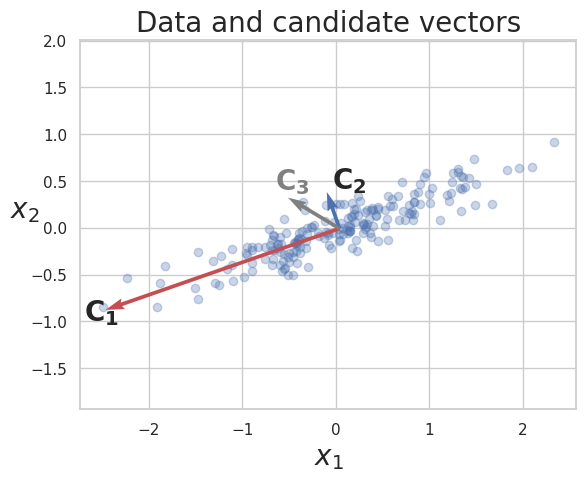

In [ ]:
#@title [Visualize principal components]
# set x and y labels
plt.figure()
plt.title('Data and candidate vectors', size = 20)
plt.xlabel('$x_1$', size=20)
plt.ylabel('$x_2$', size=20, rotation = 0)

# plot data points
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)

for length, principal_axis, axis_name, i_color in zip(pca.explained_variance_,
                                    pca.components_,
                                    ['$\mathbf{C_1}$','$\mathbf{C_2}$'],
                                    ['r','b']):
    v = principal_axis * np.sqrt(length)
    v0, v1 = pca.mean_, pca.mean_ + v

    # draw principal axis
    plt.quiver(*v0,*(v1-v0),scale=0.33, scale_units='xy', color=i_color)

    # label the  principal axis
    plt.text(*(3.4*v1), axis_name, size = 20)

# draw 3rd component
lengths = np.eye(2)
np.fill_diagonal(lengths, np.sqrt(pca.explained_variance_))

c3 = pca.mean_+[-0.5,0.3]

plt.quiver(*pca.mean_,
           *(1.1*(c3-pca.mean_)),
           scale=1,
           scale_units='xy',
           color='grey')

# label the  principal axis
plt.text(*(1.4*c3),
         '$\mathbf{C_3}$',
         size = 20,
         color='grey')

plt.axis('equal')
plt.show()

In [ ]:
# draw projections of data points on different vectors
projections = X@pca.components_
print(projections.shape)

arbitary_projection = X@c3
print(arbitary_projection.shape)

(200, 2)
(200,)


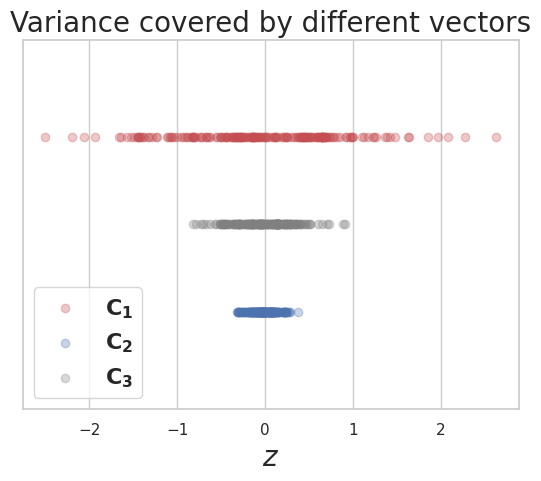

In [ ]:
# plt.figure(figsize=(8,6))
plt.scatter(projections[:,0], 1+np.zeros((200,1)),  alpha = 0.3, color='r')
plt.scatter(projections[:,1], -1+np.zeros((200,1)),  alpha = 0.3, color='b')
plt.scatter(arbitary_projection,np.zeros((200,)),  alpha = 0.3, color='grey')
plt.legend(['$\mathbf{C_1}$', '$\mathbf{C_2}$','$\mathbf{C_3}$'], prop={'size' : 16})
plt.title("Variance covered by different vectors", size = 20)
plt.ylim([-1.5,1.5])
plt.axis('equal')
plt.grid(True)
plt.yticks([],[])
plt.xlabel('$z$', size = 20)
plt.show()

### Reducing Dimensions


We can use PCA to reduce number of dimensions of a dataset. The components that are least important i.e. their explained variance is low, are removed and only those components that capture  high (i.e. desired) amount of variance are kept.

Let's reduce the dimension of our data from 2 to 1. You can observe the transformed data has only 1 feature.

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


To better understand what happend to our data, let's visualize our original data and the reduced data.

To do this, we will need to bring the transformed data into space of original data, which can be accomplished by `inverse_transform` methond of `PCA` object.

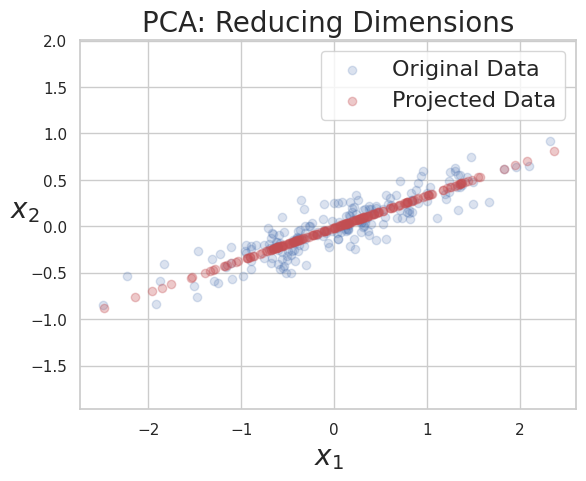

In [ ]:
#@title [Visualize data in PC space]
# inverse transform the reduced data
X_new = pca.inverse_transform(X_pca)

plt.figure()
plt.title('PCA: Reducing Dimensions', size = 20)
plt.xlabel('$x_1$', size=20)
plt.ylabel('$x_2$', size=20, rotation = 0)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.3, c='r')
plt.legend(['Original Data', 'Projected Data'], prop={'size' : 16})
plt.axis('equal')
plt.show()

From above chart it is clear that the new/transformed data points are now projected on $\mathbf C_1$ vector.

## **12. Chaining Transformers**

The preprocessing transformations are applied one after another on the input feature matrix.

> It is important to apply exactly same transformation on training, evaluation and test set in the same order.

Failing to do so would lead to incorrect predictions from model due to distribution shift and hence incorrect performance evaluation.

The `sklearn.pipeline` module provides utilities to build a composite estimator, as a chain of transformers and estimators.

### Pipeline

Sequentially apply a list of transformers and estimators.
*  Intermediate steps of the pipeline must be ‘transformers’ that is, they must implement `fit` and `transform` methods.
*  The final estimator only needs to implement `fit`.

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

#### Creating pipelines

A pipeline can be created with `Pipeline()`.
It takes a list of `('estimatorName'`, `estimator(...))` tuples. The pipeline object exposes interface of the last step.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

estimators = [
    ('simpleImpute', SimpleImputer()),
    ('standardScaler', StandardScaler())
]

pipe = Pipeline(steps=estimators)

The same pipeline can also be created via `make_pipeline()` helper function, which doesn't take names of the steps and assigns them generic names based on their steps.

In [ ]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(SimpleImputer(),
                     StandardScaler())

#### Accessing Individual steps in a pipeline

In [ ]:
from sklearn.decomposition import PCA

estimators = [
    ('simpleImputer', SimpleImputer()),
    ('pca', PCA()),
    ('regressor', LinearRegression())
]

pipe = Pipeline(steps=estimators)

In [ ]:
# number of steps in pipeline

print(len(pipe.steps))

3


In [ ]:
# Each steps

print(pipe.steps)

[('simpleImputer', SimpleImputer()), ('pca', PCA()), ('regressor', LinearRegression())]


In [ ]:
# Accessing 2nd estimator in 4 ways

print(pipe.named_steps.pca) #1

print(pipe.steps[1]) #2

print(pipe[1]) #3

print(pipe['pca']) #4

PCA()
('pca', PCA())
PCA()
PCA()


#### Accessing parameters of a step in pipeline

Parameters of the estimators in the pipeline can be accessed using the <estimator>__<parameterName> syntax, note there are two underscores between <estimator> and <parameterName>

In [ ]:
estimators = [
  ('simpleImputer', SimpleImputer()),
  ('pca', PCA()),
  ('regressor', LinearRegression())
]
pipe = Pipeline(steps=estimators)

pipe.set_params(pca__n_components = 2)

Pipeline(steps=[('simpleImputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('regressor', LinearRegression())])

In above example `n_components` of `PCA()` step is set after the pipeline is created.

#### GridSearch with pipeline

By using naming convention of nested parameters, grid search can implemented.

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = dict(imputer=['passthrough',
                           SimpleImputer(),
                           KNNImputer()],
                  clf=[SVC(), LogisticRegression()],
                  clf__C=[0.1, 10, 100])
grid_search = GridSearchCV(pipe, param_grid=param_grid)

* `C` is an inverse of regularization, lower its value stronger the regularization is.

* In the example above `clf__C` provides a set of values for grid search.

#### Caching Transformers

Transforming data is a computationally expensive step.

* For grid search, transformers need not be applied for every parameter configuration. They can be applied only once, and the transformed data can reused.

This can be achieved by setting `memory` parameter of a `pipeline` object.

In [ ]:
import tempfile

tempDirPath = tempfile.TemporaryDirectory()

In [ ]:
estimators = [
  ('simpleImputer', SimpleImputer()),
  ('pca', PCA(2)),
  ('regressor', LinearRegression())
]
pipe = Pipeline(steps=estimators, memory = tempDirPath)

### FeatureUnion

Concatenates results of multiple transformer objects.

* Applies a list of transformer objects in parallel, and their outputs are concatenated side-by-side into a larger matrix.

`FeatureUnion` and `Pipeline` can be used to create complex transformers.

## **13. Visualizing Pipelines**

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Pipeline for numerical objects
num_pipeline = Pipeline([('selector',ColumnTransformer([('select_first_4',
                                                         'passthrough',
                                                         slice(0,4))])),
                         ('imputer', SimpleImputer(strategy="median")),
                         ('std_scaler', StandardScaler()),
                        ])

# Pipeline for categorical objects
cat_pipeline = ColumnTransformer([('label_binarizer', LabelBinarizer(),[4]),
                                  ])

# FeauteUnion on both pipelines
full_pipeline = FeatureUnion(transformer_list=
                             [("num_pipeline", num_pipeline),
                              ("cat_pipeline", cat_pipeline),
                             ])

In [ ]:
from sklearn import set_config
set_config(display='diagram')

# display HTML representaion in a jupyter context
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('label_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])


## 14. Handling imbalanced data  

Imbalanced datasets are those where one class is very less represented than the other class. This kind of data results in less efficient ML algorithms.

There are two main approaches to handle imbalanced data:

*    Undersampling
*    Oversampling


We will demonstrate how to handle imbalance with the help of wine quality dataset that we have used earlier in this notebook.

We will reload this dataset once more before using it for the demonstration.

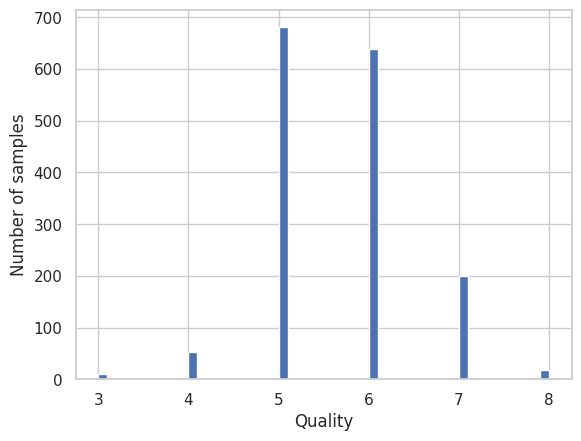

In [ ]:
wine_data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/"
    "winequality-red.csv",
    sep=";")

# display the histogram of the target variable 'quality'
wine_data['quality'].hist(bins=50)
plt.xlabel('Quality')
plt.ylabel('Number of samples')
plt.show()

In [ ]:
wine_data.shape

(1599, 12)

### **Undersampling**

Undersampling refers to sampling from the majority class in order to keep only a part of these data points.

It may be carried out using **RandomUnderSampler** class from **imblearn** library.


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# class count
class_count_3, class_count_4, class_count_5, class_count_6, class_count_7, class_count_8 = wine_data['quality'].value_counts()

# Separate class
class_3 = wine_data[wine_data['quality'] == 3]
class_4 = wine_data[wine_data['quality'] == 4]
class_5 = wine_data[wine_data['quality'] == 5]
class_6 = wine_data[wine_data['quality'] == 6]
class_7 = wine_data[wine_data['quality'] == 7]
class_8 = wine_data[wine_data['quality'] == 8]


# print the shape of the class
print('class 3:', class_3.shape)
print('class 4:', class_4.shape)
print('class 5:', class_5.shape)
print('class 6:', class_6.shape)
print('class 7:', class_7.shape)
print('class 8:', class_8.shape)


class 3: (10, 12)
class 4: (53, 12)
class 5: (681, 12)
class 6: (638, 12)
class 7: (199, 12)
class 8: (18, 12)


In [ ]:
from collections import Counter #It allows you to count the items in an iterable list.

X = wine_data.drop(['quality'], axis=1)
y = wine_data['quality']

undersample = RandomUnderSampler(random_state=0)
X_rus, y_rus = undersample.fit_resample(X,y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample dataset shape Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})



The class with the least number of samples is '3'. Hence all the other class samples are reduced to the number of samples in the least class.

### Oversampling

Oversampling refers to replicating some points from the minority class in order to increase the cardinality of the minority class. This might consist of either replicating or generating synthetic data for the minority class.

It may be carried out using **RandomOverSampler** class from **imblearn** library.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_ros))

original dataset shape: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample dataset shape Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


In [ ]:
print(X_ros.shape[0] - X.shape[0], "New random points generated with RandomOverSampler")

2487 New random points generated with RandomOverSampler


The class with the majority number of samples is '5'. Hence all the other class samples that are lesser than this class count are newly sampled to the number of samples in the majority class.

**4.2 Oversampling using SMOTE**

SMOTE (Synthetic Minority Oversampling Technique) is a popular technique for oversampling.  It is available under **imblearn** library.

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)
counter = Counter(y_sm)
counter

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})

In [ ]:
print(X_sm.shape[0] - X.shape[0], "New random points generated with SMOTE")

2487 New random points generated with SMOTE


**Types of SMOTE:**
*   Borderline SMOTE
*   Borderline-SMOTE SVM
*   Adaptive Synthetic Sampling (ADASYN)